<a href="https://colab.research.google.com/github/tohver/Data_Science/blob/master/big_O_notation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big O Notation

In [ ]:
import time

#### Constant Time

In [ ]:
def take_first(my_list):
  return my_list[0]

In [ ]:
short_list = [13, 25, 42]

In [ ]:
tic = time.clock()
first = take_first(short_list)
toc = time.clock()

In [ ]:
first

13

In [ ]:
toc-tic

6.0999999999866716e-05

In [ ]:
long_list = [42] * 10**8 # one hundred million items

In [ ]:
len(long_list)

100000000

In [ ]:
tic = time.clock()
first = take_first(long_list)
toc = time.clock()

In [ ]:
first

42

In [ ]:
toc-tic

5.999999999994898e-05

In [ ]:
list_lengths = [10**l for l in range(1, 8)]
list_lengths

[10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [ ]:
constant_times = []

for l in list_lengths:
  lst = [42]*l
  
  tic = time.clock()
  x = take_first(lst)
  toc = time.clock()
  
  constant_times.append(toc-tic)

In [ ]:
import pandas as pd

In [ ]:
constant_df = pd.DataFrame(list(zip(list_lengths, constant_times)), columns=['N', 'time'])
constant_df

,N,time
0,10,0.000004
1,100,0.000001
2,1000,0.000001
3,10000,0.000002
4,100000,0.000002
5,1000000,0.000005
6,10000000,0.000010


#### Linear Time

In [ ]:
def find_max(my_list):
  max_value = my_list[0]
  for i in range(len(my_list)):
    if my_list[i] > max_value:
      max_value = my_list[i]
  return max_value

In [ ]:
tic = time.clock()
largest = find_max(short_list)
toc = time.clock()

In [ ]:
largest

42

In [ ]:
toc-tic

9.400000000026054e-05

In [ ]:
tic = time.clock()
largest = find_max(long_list)
toc = time.clock()

In [ ]:
largest

42

In [ ]:
toc-tic

5.187785999999999

In [ ]:
linear_times = []

for l in list_lengths:
  lst = [42]*l
  
  tic = time.clock()
  x = find_max(lst)
  toc = time.clock()
  
  linear_times.append(toc-tic)

In [ ]:
linear_df = pd.DataFrame(list(zip(list_lengths, linear_times)), columns=['N', 'time'])
linear_df

,N,time
0,10,0.000013
1,100,0.000005
2,1000,0.000054
3,10000,0.000492
4,100000,0.005183
5,1000000,0.050999
6,10000000,0.511218


In [ ]:
import seaborn as sns

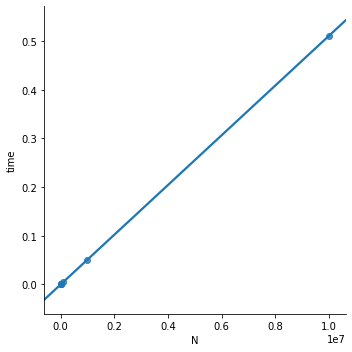

In [ ]:
_ = sns.lmplot(x='N', y='time', data=linear_df, ci=None)

#### Polynomial Time

In [ ]:
def element_multiplier(my_list): 
  for i in range(len(my_list)):
    for j in range(len(my_list)):
      x = my_list[i] * my_list[j]

In [ ]:
list_lengths

[10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [ ]:
list_lengths[:4] # compute time gets annoyingly long from list_lengths[5] onward

[10, 100, 1000, 10000]

In [ ]:
granular_list_lengths = list_lengths[:4] + [50, 500, 5000]
granular_list_lengths

[10, 100, 1000, 10000, 50, 500, 5000]

In [ ]:
granular_list_lengths.sort()

In [ ]:
granular_list_lengths

[10, 50, 100, 500, 1000, 5000, 10000]

In [ ]:
poly_times = []

for l in granular_list_lengths:
  lst = [42]*l

  tic = time.clock()
  x = element_multiplier(lst)
  toc = time.clock()

  poly_times.append(toc-tic)

In [ ]:
poly_df = pd.DataFrame(list(zip(granular_list_lengths, poly_times)), columns=['N', 'time'])
poly_df

,N,time
0,10,0.000021
1,50,0.000173
2,100,0.000673
3,500,0.018461
4,1000,0.075228
5,5000,1.946877
6,10000,7.775681


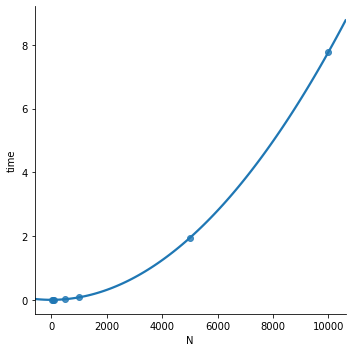

In [ ]:
_ = sns.lmplot(x='N', y='time', data=poly_df, ci=None, order=2)

 #### In Big O notation: 

 * constant: O(1)
 * linear: O(N)
 * polynomial: O(N**2) 
 

 #### Others

* logarithmic: O(log N)
* exponential: O(2**N)
* O(N log N)
* O(N!) 